# setup environment simulation

In [5]:
import pandas as pd# importing necessary libraries

class MiningSimulation:#creating class
    def __init__(self, data):# creating constructor
        self.data = data
        self.minerals = {}
    def extract_minerals(self, location, mineral_type):
        # Simulate extraction of minerals based on the type found at the location
        print(f"Extracting {mineral_type} at {location}...")
    def simulate_mining(self):
        for index, row in self.data.iterrows():
            location = (row['Length'], row['Width'], row['Depth'])
            mineral_type = row['Mineral']
            if location not in self.minerals:
                self.minerals[location] = []
            self.minerals[location].append(mineral_type)
            self.extract_minerals(location, mineral_type)
            
#defining data
data = pd.DataFrame({
    'Length': [1000, 1000, 10250, 12080, 10250,12081, 10250, 10250, 500],
    'Width': [800, 800, 400, 400, 400, 400, 400, 400, 10],
    'Depth': [200, 200, 200, 200, 200, 200, 200, 200, 800],
    'Mineral': ['Gold', 'Coal', 'Iron', 'Silver', 'Zinc', 'Lead', 'Soil', 'TPH', 'Overburden']
})

sim = MiningSimulation(data)
sim.simulate_mining()

Extracting Gold at (1000, 800, 200)...
Extracting Coal at (1000, 800, 200)...
Extracting Iron at (10250, 400, 200)...
Extracting Silver at (12080, 400, 200)...
Extracting Zinc at (10250, 400, 200)...
Extracting Lead at (12081, 400, 200)...
Extracting Soil at (10250, 400, 200)...
Extracting TPH at (10250, 400, 200)...
Extracting Overburden at (500, 10, 800)...


# Map data shema relationship

In [6]:
from sqlalchemy import create_engine, Column, Integer, String, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship

# Create an engine to connect to a SQLite database
engine = create_engine('sqlite:///mining_data.db', echo=True)

# Base class for declarative class definitions
Base = declarative_base()

# Define Equipment class
class Equipment(Base):
    __tablename__ = 'equipment'
    equipment_id = Column(Integer, primary_key=True)
    name = Column(String)
    type = Column(String)
    location = Column(String)
    maintenance_records = relationship("MaintenanceRecord", back_populates="equipment")
    
# Define MaintenanceRecord class
class MaintenanceRecord(Base):
    __tablename__ = 'maintenance_records'
    record_id = Column(Integer, primary_key=True)
    equipment_id = Column(Integer, ForeignKey('equipment.equipment_id'))
    description = Column(String)
    duration = Column(Integer)
    equipment = relationship("Equipment", back_populates="maintenance_records")
    
# Define Ore class
class Ore(Base):
    __tablename__ = 'ores'
    ore_id = Column(Integer, primary_key=True)
    type = Column(String)
    quantity = Column(Integer)
    location = Column(String)
    
# Define MiningSite class
class MiningSite(Base):
    __tablename__ = 'mining_sites'
    site_id = Column(Integer, primary_key=True)
    name = Column(String)
    location = Column(String)
    ores = relationship("Ore", back_populates="site")
    
# Associate Ores with MiningSites
Ore.site_id = Column(Integer, ForeignKey('mining_sites.site_id'))
Ore.site = relationship("MiningSite", back_populates="ores")

# Create tables
Base.metadata.create_all(engine)

2024-02-01 15:53:12,193 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-02-01 15:53:12,194 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("equipment")
2024-02-01 15:53:12,195 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-02-01 15:53:12,199 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("equipment")
2024-02-01 15:53:12,200 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-02-01 15:53:12,203 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("maintenance_records")
2024-02-01 15:53:12,207 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-02-01 15:53:12,218 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("maintenance_records")
2024-02-01 15:53:12,220 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-02-01 15:53:12,228 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("ores")
2024-02-01 15:53:12,231 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-02-01 15:53:12,235 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("ores")
2024-02-01 15:53:12,239 INFO sqlalchemy.engi

# build geological models

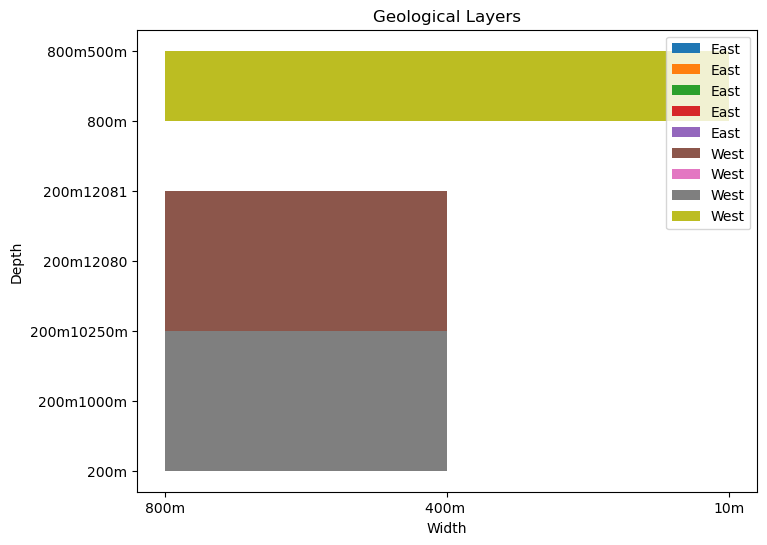

In [16]:
#Build geological models
import matplotlib.pyplot as plt
import pandas as pd

# Read data from the provided CSV file
data = pd.read_csv('geo.csv')
#class MiningSection:
#    def __init__(self, env, name, length, width, depth):
 #       self.env = env
  #      self.name = name
   #     self.length = length
    #    self.width = width
     #   self.depth = depth
      #  self.equipment_queue = simpy.Store(env)
        
   
        
def visualize_geological_layers(data):
    
    fig, ax = plt.subplots(figsize=(8, 6))
    for _, section in data.iterrows():
        depth_start = section['Depth']
        depth_end = depth_start + section['Length']
        width = section['Width']
        ax.fill_betweenx(y=[depth_start, depth_end], x1=0, x2=width, label=section['Section'])
    ax.set_xlabel('Width')
    ax.set_ylabel('Depth')
    ax.set_title('Geological Layers')
    ax.legend()
    plt.show()
    
# Visualize geological layers based on the provided data
visualize_geological_layers(data)







# Construct equipment objects

In [18]:
#create class
class Equipment:
    def __init__(self, name, description):# create constructor
        self.name = name
        self.description = description
    def __str__(self):
        return f"{self.name}: {self.description}"
    
class Excavator(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class DumpTruck(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Drill1(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Drill2(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Backhoe(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Loader1(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Loader2(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Loader3(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Scrapper(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Truck1(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Truck2(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Truck3(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Truck4(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Shovel1(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)
        
class Dragline1(Equipment):
    def __init__(self, name, description):
        super().__init__(name, description)

excavator = Excavator("Excavator", "Used for digging and removing earth and ore.")
print(excavator)
dump_truck = DumpTruck("Dump Truck", "Transport materials like ore and waste rock.")
print(dump_truck)
drill = Drill1("Drill", "Drill the boreholes.")
print(drill)
Shovel = Shovel1("Shovel", "excavate large quantities of soil and rock fragments.")
print(Shovel)
backhoe = Backhoe("backhoe", "helps in digging the trench.")
print(backhoe)
Scrapper = Scrapper("scrapper", "used in transporting ore or waste for short distances. .")
print(Scrapper)
loader = Loader1("loader", "use to transport minerals and other extracted ores and rock waste")
print(loader)
truck = Truck1("truck", "underground use in more confined spaces.")
print(truck)
dragline = Dragline1("dragline", "is used in large-scale works..")
print(dragline)

Excavator: Used for digging and removing earth and ore.
Dump Truck: Transport materials like ore and waste rock.
Drill: Drill the boreholes.
Shovel: excavate large quantities of soil and rock fragments.
backhoe: helps in digging the trench.
scrapper: used in transporting ore or waste for short distances. .
loader: use to transport minerals and other extracted ores and rock waste
truck: underground use in more confined spaces.
dragline: is used in large-scale works..


# material properties

# mine plans - equipments

In [21]:
class Equipment:# creating class
    def __init__(self, name, capacity, power):# creating constructor
        self.name = name
        self.capacity = capacity
        self.power = power
        
def generate_plans(equipment_list):# function to generate plans
    plans = []
    for equipment in equipment_list:
        plans.append(f"Plan for {equipment.capacity} {equipment.power} {equipment.name}(s)")
    return plans

equipment_list = [
    Equipment("Drill1", 2000, 4500),
    Equipment("Drill2", 1500, 3500),
    Equipment("Truck1", 283.16, 4362.34),
    Equipment("Truck1", 283.16, 4362.34),
    Equipment("Truck2", 283.16, 4362.34),
    Equipment("Loader1", 9.17, 2000),
    Equipment("Loader1", 9.17, 2000),
    Equipment("Loader1", 9.17, 2000),
    Equipment("Loader1", 9.17, 2000),
    Equipment("Loader1", 9.17, 2000),
    Equipment("Loader1", 9.17, 2000)
]
plans = generate_plans(equipment_list)
for plan in plans:
    print(plan)

Plan for 2000 4500 Drill1(s)
Plan for 1500 3500 Drill2(s)
Plan for 283.16 4362.34 Truck1(s)
Plan for 283.16 4362.34 Truck1(s)
Plan for 283.16 4362.34 Truck2(s)
Plan for 9.17 2000 Loader1(s)
Plan for 9.17 2000 Loader1(s)
Plan for 9.17 2000 Loader1(s)
Plan for 9.17 2000 Loader1(s)
Plan for 9.17 2000 Loader1(s)
Plan for 9.17 2000 Loader1(s)


# graphs

<BarContainer object of 9 artists>

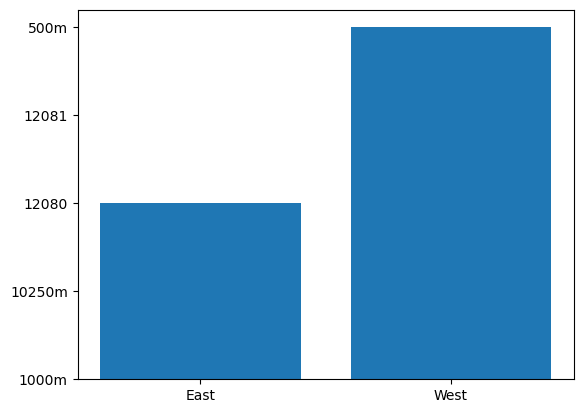

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_csv("geo.csv")
x = data['Section']
y = data['Length']

plt.bar(x,y)

<BarContainer object of 9 artists>

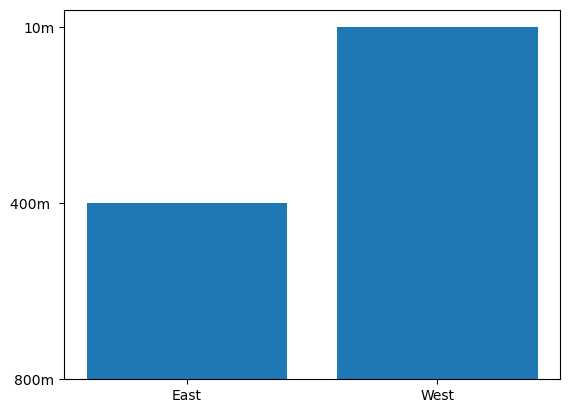

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_csv("geo.csv")
x = data['Section']
y = data['Width']

plt.bar(x,y)

<BarContainer object of 9 artists>

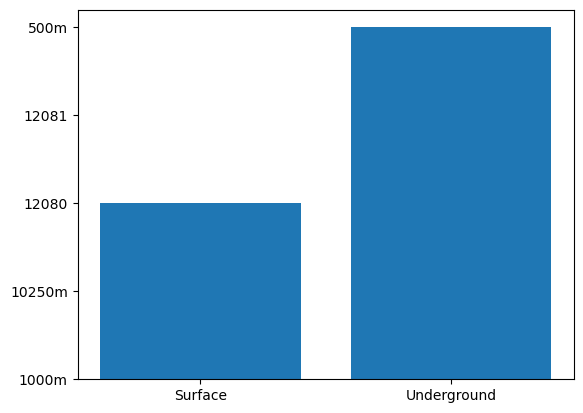

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_csv("geo.csv")
x = data['Type']
y = data['Length']

plt.bar(x,y)

<BarContainer object of 9 artists>

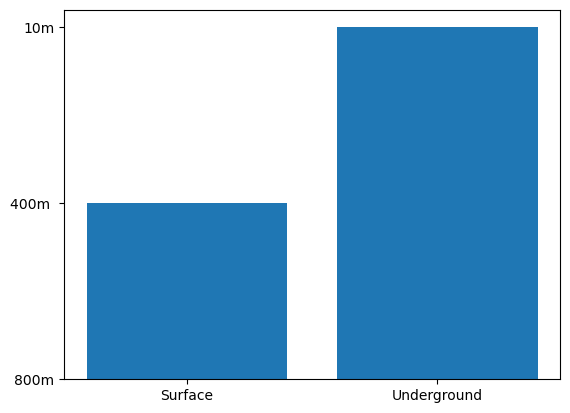

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_csv("geo.csv")
x = data['Type']
y = data['Width']

plt.bar(x,y)

<BarContainer object of 11 artists>

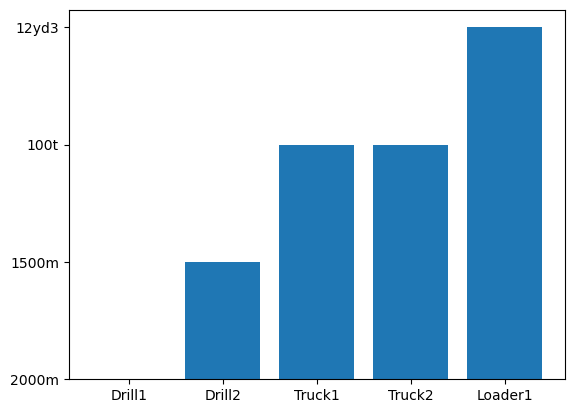

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_excel("equipment1.xlsx")
x = data['Equipment']
y = data['Capacity']

plt.bar(x,y)

<BarContainer object of 11 artists>

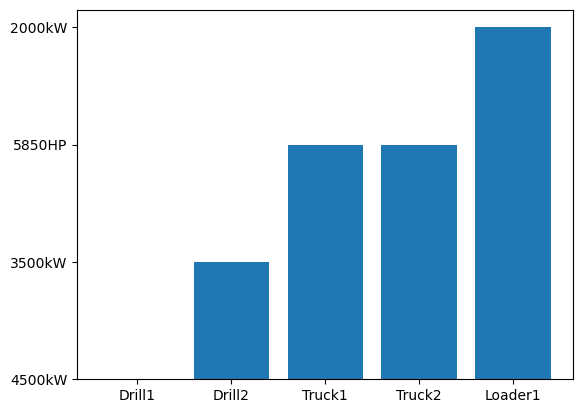

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_excel("equipment1.xlsx")
x = data['Equipment']
y = data['Power']

plt.bar(x,y)

<BarContainer object of 14 artists>

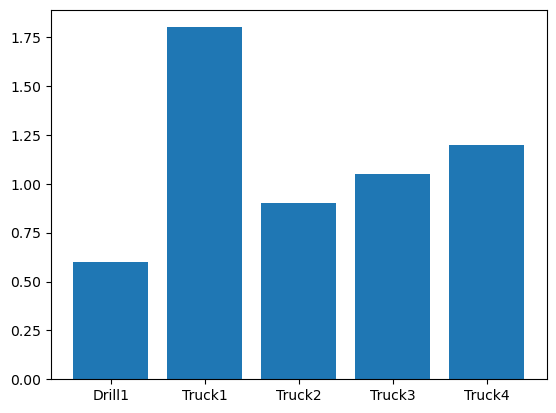

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_excel("utility.xlsx")
x = data['Equipment']
y = data['Utilization']

plt.bar(x,y)

<BarContainer object of 14 artists>

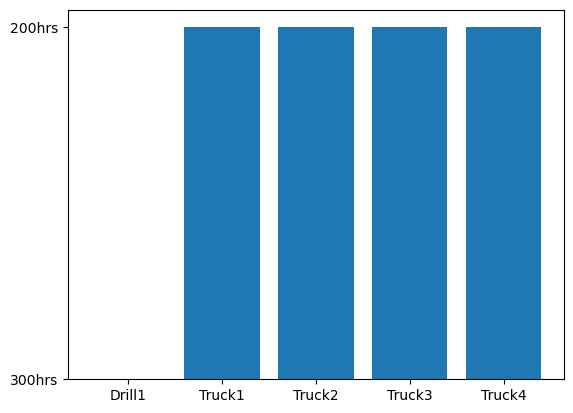

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_excel("utility.xlsx")
x = data['Equipment']
y = data['MTBF']

plt.bar(x,y)

<BarContainer object of 14 artists>

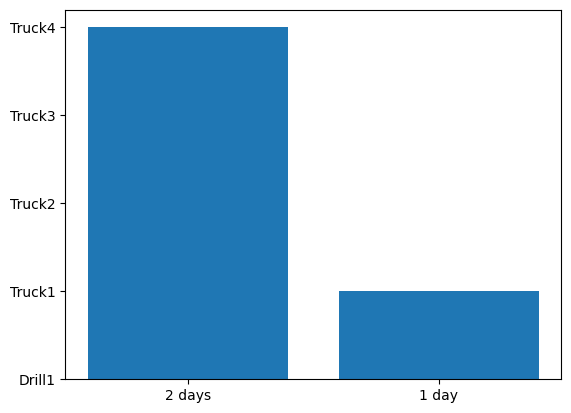

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd .read_excel("utility.xlsx")
x = data['MTTR']
y = data['Equipment']

plt.bar(x,y)

# create variance of simulation and time(integration)

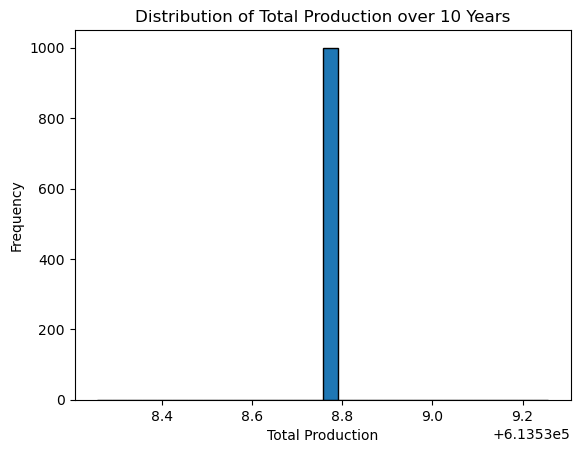

In [39]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define Simulation Variables

num_simulations = 1000
num_years = 10
ore_grades = np.random.uniform(0.5, 2.0, num_simulations)
equipment_efficiency = np.random.normal(0.8, 0.1, num_simulations)
labor_availability = np.random.uniform(0.7, 1.0, num_simulations)
market_demand = np.random.normal(100000, 20000, num_simulations)

# Step 2: Generate Scenarios

ore_grade_scenario = np.random.choice(ore_grades, size=num_years)
equipment_efficiency_scenario = np.random.choice(equipment_efficiency, size=num_years)
labor_availability_scenario = np.random.choice(labor_availability, size=num_years)
market_demand_scenario = np.random.choice(market_demand, size=num_years)

# Step 3: Run Simulations

def simulate_mining(ore_grade, equipment_efficiency, labor_availability, market_demand):
    production = ore_grade * equipment_efficiency * labor_availability * market_demand
    return production

# Step 4: Analyze Results

total_production = []
for i in range(num_simulations):
    production_scenario = []
    for year in range(num_years):
        production = simulate_mining(ore_grade_scenario[year], equipment_efficiency_scenario[year],
                                     labor_availability_scenario[year], market_demand_scenario[year])
        production_scenario.append(production)
    total_production.append(sum(production_scenario))

# Visualization
plt.hist(total_production, bins=30, edgecolor='black')
plt.xlabel('Total Production')
plt.ylabel('Frequency')
plt.title('Distribution of Total Production over {} Years'.format(num_years))
plt.show()